In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob

In [3]:
def jagged_mean(arr):
    from copy import deepcopy
    arr = deepcopy(arr)
    m = []
    cnt = 0
    s = 0
    m_len = 0
    for a in arr:
        m_len = max(m_len, len(a))
    for _ in range(m_len):
        for a in arr:
            if len(a) > 0:
                cnt += 1
                s += a.pop(0)
        m.append(s/cnt)
        s=0
        cnt=0
    return m

In [6]:
filenames = glob.glob('../results/*gmsc_clue_hyperparameters*.json')[1:]

files = [open(name) for name in filenames]

In [7]:
jsons = np.reshape(np.array([json.load(f) for f in files]), (4, 5))

In [5]:
# mmds = {name: [jsonf[name]['mmd'] for jsonf in jsons for name in jsonf['metadata']['generators']]}

In [8]:
methods = jsons[0][0]['metadata']['generators'].keys()

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


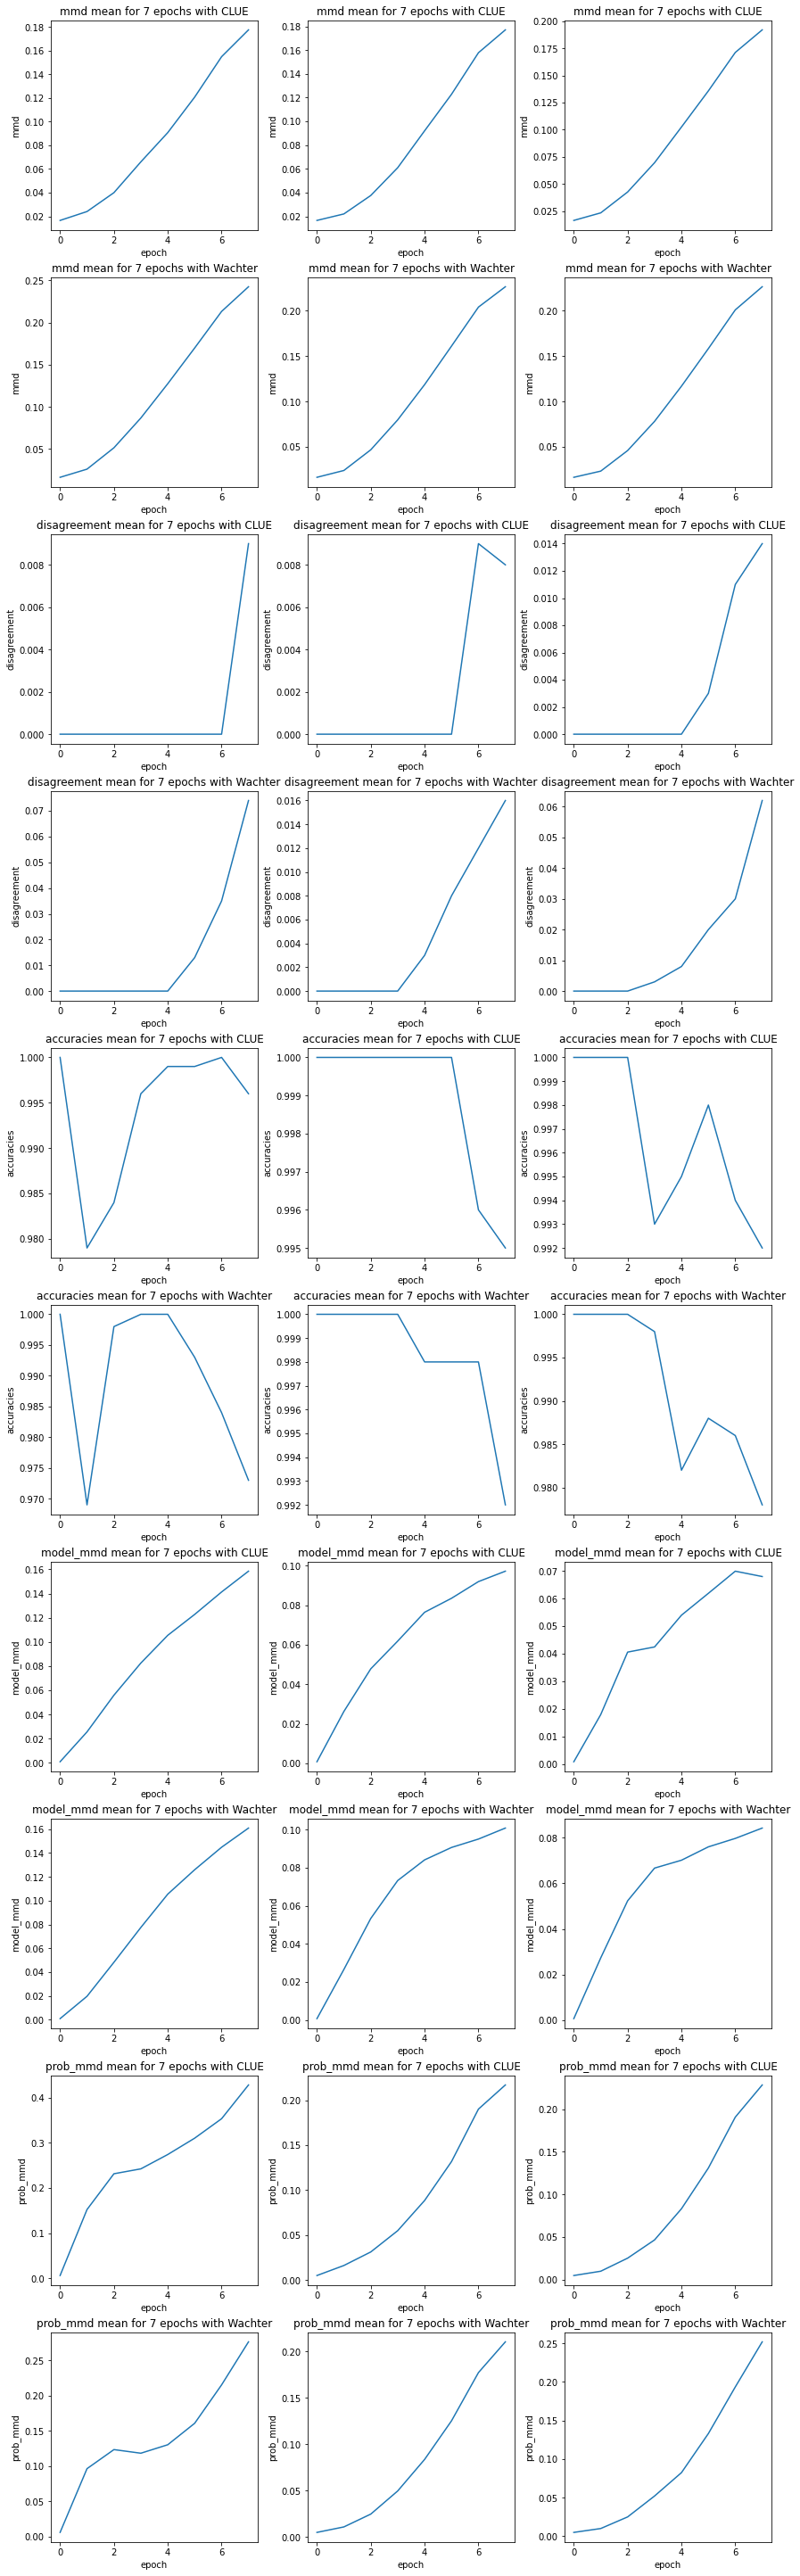

In [7]:
metrics = ['mmd', 'disagreement', 'accuracies', 'model_mmd', 'prob_mmd']
ncols = len(jsons)
nrows = len(metrics)*len(methods)

limits = {'mmd': (0, 0.16), 'disagreement': (0, 0.14), 'accuracies': (0.93, 1.01)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            ax = axs[len(methods) * i + j, k]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric])
            ax.plot(jagged_mean(raw))
#             ax.fill_between(range(len(m_d[method][metric])), np.min(raw, axis=0), np.max(raw, axis=0), facecolor='#f0f0f0')
            ax.set_title(f'{metric} mean for {len(m_d[method][metric]) - 1} epochs with {method}')
            ax.set_xlabel('epoch')
            ax.set_ylabel(metric)
#             if metric in limits:
#                 ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()
fig.savefig('images/results.png')

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


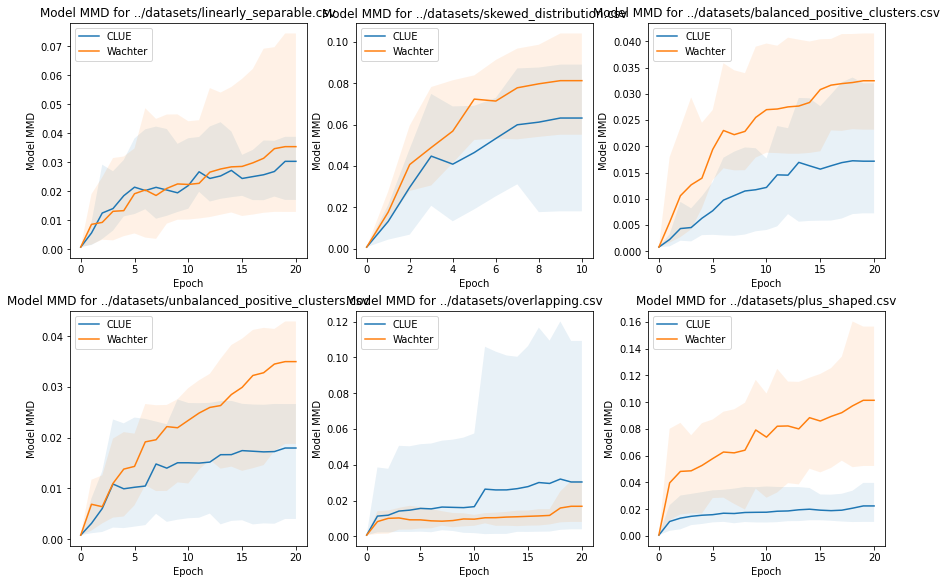

In [72]:
metrics = {
#     'mmd': 'MMD', 
#     'disagreement': 'Disagreement', 
    'model_mmd': 'Model MMD'
}
ncols = 3
nrows = 2

datasets = ['linearly_separable', 'skewed_distribution', 'balanced_positive_clusters', 'unbalanced_positive_clusters', 
             'overlapping', 'plus_shaped']

limits = {'mmd': (0, 0.25), 'disagreement': (0, 0.14), 'model_mmd': (0, 0.18)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            name = method
            ax = axs[int(k/3), k % 3]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric])
            mean = jagged_mean(raw)
#             mean = np.interp(np.arange(0, len(mean) - 1, (len(mean) - 1)/100), np.arange(0, len(mean)), mean)
#             print(lin_int)
            ax.fill_between(range(len(m_d[method][metric])), np.min(raw, axis=0), np.max(raw, axis=0), alpha=.1)
            ax.plot(mean, label=name)
            ax.set_title(f"{metrics[metric]} for {m_d['metadata']['dataset']}")
            ax.set_xlabel('Epoch')
            ax.set_ylabel(metrics[metric])
            ax.legend(loc=2)
#         if metric in limits:
#             ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()
fig.savefig('images/results_varying_models.png')

C:\Users\drobi\anaconda3\envs\recourse2\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


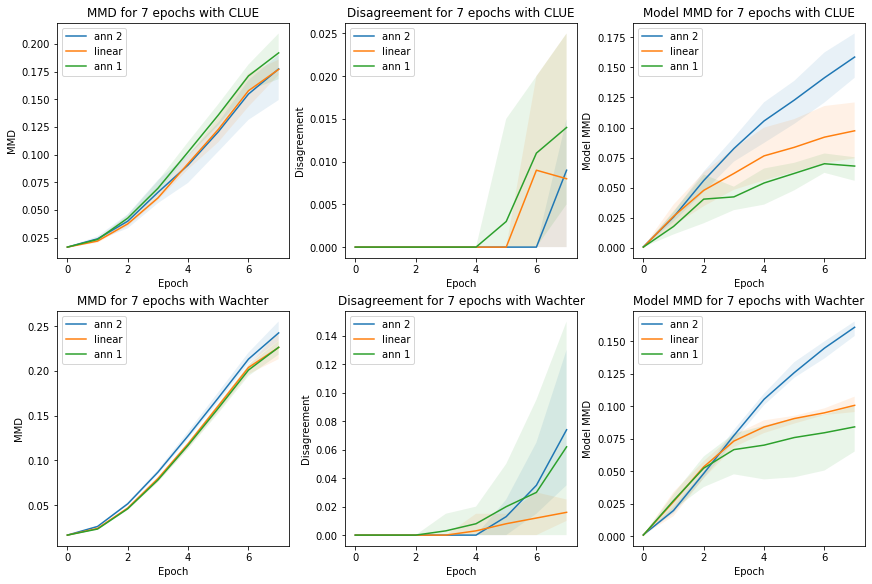

In [46]:
metrics = {'mmd': 'MMD', 'disagreement': 'Disagreement', 'model_mmd': 'Model MMD'}
ncols = len(metrics)
nrows = len(methods)

limits = {'mmd': (0, 0.25), 'disagreement': (0, 0.14), 'model_mmd': (0, 0.18)}

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows),
                        constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, method in enumerate(methods):
        for k, data in enumerate(jsons):
            name = m_d['metadata']['model']['model_type']
            if name == 'ann':
                name = f"{name} {len(m_d['metadata']['model']['hyperparameters']['hidden_size'])}"
            ax = axs[j, i]
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric])
            mean = jagged_mean(raw)
#             mean = np.interp(np.arange(0, len(mean) - 1, (len(mean) - 1)/100), np.arange(0, len(mean)), mean)
#             print(lin_int)
            ax.fill_between(range(len(m_d[method][metric])), np.min(raw, axis=0), np.max(raw, axis=0), alpha=.1)
            ax.plot(mean, label=name)
        ax.set_title(f'{metrics[metric]} for {len(m_d[method][metric]) - 1} epochs with {method}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel(metrics[metric])
        ax.legend(loc=2)
#         if metric in limits:
#             ax.set_ylim(limits[metric][0], limits[metric][1])

fig.show()

In [19]:
metrics = ['mmd', 'disagreement', 'model_mmd', 'prob_mmd']
ncols = len(metrics)
nrows = len(methods)

results = {}

for i, data in enumerate(jsons):
    methods = data[i]['metadata']['generators'].keys()
    results[i] = {}
    for method in methods:
        results[i][method] = {}
        for metric in metrics:        
            results[i][method][metric] = {}
            raw = []
            for m_d in data:
                raw.append(m_d[method][metric][-1])
                
            results[i][method][metric]['mean'] = np.mean(raw)
            results[i][method][metric]['std'] = np.std(raw)
                
        for m_d in data:
            succ_rate = 0
            for j in range(len(m_d[method]['benchmark'])):
                succ_rate += int(pd.read_json(m_d[method]['benchmark'][j])['Success_Rate'].loc[0])

            succ_rate /= len(m_d[method]['benchmark'])
        results[i][method]['succ_rate'] = succ_rate
    results[i]['metadata'] = data[i]['metadata']
            
results

{0: {'CLUE0': {'mmd': {'mean': 0.11032614950241362,
    'std': 0.009099837056053363},
   'disagreement': {'mean': 0.3048, 'std': 0.14015825975581236},
   'model_mmd': {'mean': 0.00030946684225399804, 'std': 2.404434617556075e-06},
   'prob_mmd': {'mean': 0.4412012968699006, 'std': 0.06031481296725971},
   'succ_rate': 1.0},
  'metadata': {'iterations': 100,
   'samples': 10,
   'generators': {'CLUE0': {'class': 'Clue',
     'hyperparameters': {'data_name': 'custom',
      'train_vae': True,
      'width': 12,
      'depth': 4,
      'latent_dim': 16,
      'batch_size': 64,
      'epochs': 2,
      'lr': 0.001,
      'early_stop': 10}}},
   'model': {'model_type': 'ann',
    'hyperparameters': {'lr': 0.005,
     'epochs': 4,
     'batch_size': 20,
     'hidden_size': [15, 10]}},
   'dataset': '../datasets/give_me_some_credit_balanced/give_me_some_credit.csv',
   'np_seed': 2147483648}},
 1: {'CLUE1': {'mmd': {'mean': 0.06293554714245678,
    'std': 0.01690084137014303},
   'disagreemen